CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW2:  The Distribution of Movie Ratings

Movie ratings are numeric scores summarizing the quality of a movie.
In this assignment, we study two sources of ratings:
<ul><li>
up-to-date, recently tweeted movie ratings (from MovieTweetings)
</li><li>
historical movie rating averages (from IMDb).
</li></ul>

Ratings from both of these sources are numeric values, ranging from 0 to 10.

Perhaps remarkably, the distribution for the two kinds of ratings look the same.
The goal of this assignment is to characterize the movie ratings distribution.

<blockquote>
<i style="color:blue;">
Your program is supposed to produce an output file answering four sets of questions
(10 questions in all):
<ul><li>
characterizing the distribution of live MovieTweetings movie ratings
</li><li>
studying the differences between average and median MovieTweetings ratings.
</li><li>
characterizing the distribution of archival IMDb movie ratings
</li><li>
analyzing skewness of the Gamma distribution.
</li></ul>
</i>
</blockquote>
The details of these questions are laid out in the notebook.
And as it explains, your program should produce a CSV file <tt>HW2_output.csv</tt> answering the questions.
A correct output file could look like this:
<pre>
     lognormal,5.55555,1.11111
     skewness,2.22222,
     kurtosis,3.33333,
     Batman: The Dark Knight,3.33333,8.88888
     Batman v Superman: Dawn of Justice,9.11111,9.55555
     lognormal,5.22222,1.44444
     skewness,2.55555,
     kurtosis,3.44444,
     1,,
     False,,
</pre>
This is just an example of the format of an output file; your output file will be different.


This file characterizes the distribution of ratings as a <i>lognormal distribution</i>.
This is not correct: the ratings distribution clearly cannot be lognormal,
because it is <i>negatively skewed</i> (it leans to the right)
whereas the lognormal distribution is <i>positively skewed</i> (it leans to the left).

Another distribution is needed.
The notebook suggests two possible distributions, but you job is to identify one,
and obtain the best fit (i.e., maximal likelihood parameters) for the data.


The notebook does not give as much guidance as the earlier assignment notebooks.
However, this is also a short assignment.

To complete this assignment, please upload two files to CCLE:
<br/>
<ul><li>
your output CSV file <tt>HW2_output.csv</tt>
</li><li>
your notebook file <tt>HW2_Movie_Ratings.ipynb</tt> (to show your work).
</li></ul>
<br/>
The notebook should have the commands you used to produce the output file.
All assignment grading in this course will be automated, so please assume that when uploading files.

We will use Paul Eggert's <b>Late Policy</b>:
The number of days late is $N=0$ for the first 24 hrs, $N=1$ for the next 24 hrs, etc.,
and if you submit an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are deducted.

# Part 1:  Live Movie Ratings -- extracted from Tweets

## Live Movie Ratings are available at GitHub

These ratings are updated automatically online by a process scanning current Tweets;
see the <a href="https://github.com/sidooms/MovieTweetings">Movie Tweetings</a> page of
<a href="https://scholar.google.be/citations?user=owaD8qkAAAAJ&hl=en">Simon Dooms</a>.
The information in the tweets has been digested into three tables -- about movies, users, and ratings.
(Up-to-date snapshots and archives are also available.)

In [ ]:
# bypass a problem with R reading of https connections
remote.file = function(URL) {
    temporaryFile <- tempfile()
    download.file(URL,destfile=temporaryFile, method="curl")
    return( temporaryFile )
}

In [ ]:
URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat"

Ratings = read.table( remote.file(URL), sep = ":", header=FALSE )[,c(1,3,5,7)]
colnames(Ratings) = c("UserID", "MovieID", "Rating", "TwitterID")

head(Ratings)

# if your connection to github fails when retrieving this dataset, persist in trying

In [ ]:
dim(Ratings)  # not a tiny dataset

## Exploration of the Live Ratings

In [ ]:
# Summary statistics

summary( Ratings$Rating )

In [ ]:
# Count rating values with table()

CountOfRatings = as.data.frame(table( Ratings$Rating, dnn="rating" ), responseName="count")
CountOfRatings

In [ ]:
options( repr.plot.width=4, repr.plot.height=4 ) # control plot dimensions

In [ ]:
# Histogram of Rating values (integer values from 0 to 10)

h = hist( Ratings$Rating, breaks = 0:11, col="cyan" )  # save and plot the histogram

mtext( sprintf("histogram of %d tweeted ratings", length(Ratings$Rating)) )

In [ ]:
barplot( h$counts, names.arg=0:10, col="aquamarine",
        main="latest MovieTweetings rating values" )

In [ ]:
hist( Ratings$Rating, probability=TRUE, col="palegreen", breaks=0:11 )

rating_avg = mean(Ratings$Rating)
rating_sd  = sd(Ratings$Rating)

curve( dnorm(x, mean=rating_avg, sd=rating_sd),
      col="red", add=TRUE )  #  add a curve with the normal MLE

mtext(sprintf("Ratings with superimposed normal fit (mean %4.1f, sd %4.1f)",
              rating_avg, rating_sd), cex=0.65)

# Problem 1: Find a distribution that fits the histogram of MovieTweetings Rating values

<p style="color:blue;">
<ul><li>
<b>Question 1:</b>  <b>Give the name of a specific distribution (pdf), with maximum likelihood parameter values, that resembles the MovieTweetings Rating values (as closely as you can).</b>
<br/><br/>
To permit distributions like the Beta distribution to be considered,
you can scale the rating values.
For example, dividing the values by 10 puts them in the interval [0,1],
as the Beta distribution requires.
<br/><br/>
</li><li>
<b>Question 2:</b> determine the <a href="https://en.wikipedia.org/wiki/Skewness"><b>skewness</b></a> of the MovieTweetings ratings.
<br/><br/>
</li><li>
<b>Question 3:</b> determine the (excess) <a href="https://en.wikipedia.org/wiki/Kurtosis"><b>kurtosis</b></a> of the MovieTweetings ratings.
</li></ul>
<br/><br/>
The skewness and excess kurtosis values ought to be near zero
if the data is normally distributed.
Inspecting them is a simple check of whether the data follows a normal distribution.
</p>

## You can use the fitdistr() function in this assignment

In [ ]:
not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])
if (not.installed("MASS")) install.packages("MASS")

library(MASS)

# example(fitdistr)  #  run examples showing use of the fitdistr() function

In [ ]:
# A start at analysis, which needs work:

hist( Ratings$Rating, probability=TRUE, col="palegreen", breaks=0:11 )

theta = fitdistr( Ratings$Rating+1, "lognormal" )

curve( dlnorm(x+0.5, meanlog=theta$estimate[1], sdlog=theta$estimate[2]),
      col="red", add=TRUE )  #  add a curve with the MLE fit for the lognormal density

mtext( "the lognormal distribution doesn't fit well", col="red" )
mtext( sprintf("MLE parameters:  %5.2f, %5.2f",
               theta$estimate[1], theta$estimate[2]), side=1, col="blue")

## "Trending" Movies:  movies with more than 50 current ratings

In [ ]:
NumberOfRatings = data.frame(aggregate( Rating ~ MovieID, length, data=Ratings ))
colnames(NumberOfRatings) = c("MovieID", "NumberOfRatings")

TrendingMovies = subset( NumberOfRatings, NumberOfRatings > 50 )

head(TrendingMovies)

In [ ]:
nrow(TrendingMovies)

In [ ]:
max(TrendingMovies$NumberOfRatings)

## Averaged Ratings of Trending Movies

In [ ]:
RatingsOfTrendingMovies = merge( Ratings, TrendingMovies, by="MovieID" )  # join of tables
head(RatingsOfTrendingMovies)

In [ ]:
AveragedRatingsOfTrendingMovies = aggregate( Rating ~ MovieID, mean, data=RatingsOfTrendingMovies )
head(AveragedRatingsOfTrendingMovies)

hist(AveragedRatingsOfTrendingMovies$Rating, breaks=25,
     col="orange", main="avg trending MovieTweeting ratings")

In [ ]:
maxAveragedRating = max(AveragedRatingsOfTrendingMovies$Rating)
maxAveragedRating

In [ ]:
HotTrendingMovies = subset(AveragedRatingsOfTrendingMovies, Rating == maxAveragedRating)
HotTrendingMovies

# Download the corresponding MovieTweetings movie Name &amp; Genre information

In [ ]:
URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat"
MovieText = readLines( remote.file(URL) )
Movies = matrix( sapply( MovieText,
                function(x) unlist(strsplit(sub(" [(]([0-9]+)[)]", "::\\1",x),"::"))[1:4] ),
                nrow=length(MovieText), ncol=4, byrow=TRUE )
colnames(Movies) = c("MovieID", "MovieTitle", "Year", "Genres")

head(Movies)

## joining the Ratings and Trending Movie information

In [ ]:
Ratings_and_Movies = merge( RatingsOfTrendingMovies, Movies, by="MovieID" )

head(Ratings_and_Movies)

# Problem 2:  Compare Average vs. Median Rating values for Trending Movies

<p style="color:blue;">
After computing Average and Median Rating values for each Trending Movie in the MovieTweetings data:
<ul style="color:blue;"><li>
<b>Question 4:</b> find the <b>name of the movie with the highest Average Rating</b> (and also list its Median Rating and Average Rating).
If there is more than one such movie, select any one.
<br/><br/>
</li><li>
<b>Question 5:</b> find the <b>name of the movie with the largest difference |Median Rating - Average Rating|</b> (and also list its Median Rating and Average Rating).
If there is more than one such movie, select any one.
</li></ul>
</p>
<p style="color:blue;">For describing a skewed distribution, the median can be more informative than the mean.
</p>

In [ ]:
# Hint:

# ? aggregate

# ? by

# Part 2.  Historical Movie Ratings -- from IMDb

In this part we analyze an historical dataset of movies with ratings from IMDb.

In [ ]:
#  source is at: https://github.com/hadley/ggplot2movies

if (not.installed("ggplot2movies")) install.packages("ggplot2movies")

library(ggplot2movies)

data(movies)

dim(movies)  # also not a tiny dataset

In [ ]:
summary(movies)

?movies

In [ ]:
colnames(movies)

In [ ]:
head(movies)

In [ ]:
hist( movies$rating, col="lawngreen", main="IMDb ratings", breaks=50 )

mtext( sprintf("histogram of %d movie average rating values", nrow(movies)) )

# Problem 2: Find a distribution that fits the histogram of IMDb Ratings

<p style="color:blue;">
<ul><li>
<b>Question 6:</b> <b>Give the name of a specific distribution (pdf), with maximum likelihood parameter values, that resembles the IMDb Rating values (as closely as you can).</b>
<br/><br/>
Again, to permit distributions like the Beta distribution to be considered,
you can scale the rating values.
For example, dividing the values by 10 puts them in the interval [0,1],
as the Beta distribution requires.
<br/><br/>
</li><li>
<b>Question 7:</b> determine the <a href="https://en.wikipedia.org/wiki/Kurtosis"><b>skewness</b></a> of the IMDb ratings.
<br/><br/>
</li><li>
<b>Question 8:</b> determine the (excess) <a href="https://en.wikipedia.org/wiki/Kurtosis"><b>kurtosis</b></a> of the IMDb ratings.
</li></ul>
<br/><br/>
</p>

## Possibilities:  the Extreme Value Distribution, or related distributions

<p style="color:blue;">
The <a href="http://wikipedia.org/en/Generalized_extreme_value_distribution">(Smallest) Extreme Value Distribution</a>
models the minimum of a set of values drawn from a single distribution.
It is sometimes used for modeling sets of identical independent processes
that can <i>fail</i> -- and the time of the first failure is the failure time of the entire set.
<br/><br/>
In other words, the distribution models the failure time of the <i>weakest link</i>.
<br/><br/>
The Extreme Value Distribution
is related to the <a href="http://wikipedia.org/en/Weibull_distribution">Weibull Distribution</a>.
</p>

## Possibility:  the Beta Distribution

<p style="color:blue;">
The <a href="http://wikipedia.org/en/Beta_distribution">Beta distribution</a>
is a general model for random values of percentages and proportions.
It is used very heavily in Bayesian methods.
<br/><br/>
The distribution Beta($\alpha$,$\beta$) leans to the right (like the data) when $\alpha > \beta$.
<br/><br/>
Note: As mentioned above, movie rating values are in the interval [0,10] ...
The Beta distribution requires all values to be nonnegative, and in the interval [0,1].
Thus the ratings would need to be rescaled here.
<br/><br/>
<b>Warning:</b>  the <tt>fitdistr()</tt> function appears to be fragile when fitting a beta distribution.
If you consider the Beta distribution, obtaining MLE parameter values may require a different method.
</p>

## Not a Possibility:  the Negative Gamma Distribution

<p style="color:blue;">
The <b>Negative Gamma distribution</b>
is a "mirror image" of the  <a href="http://wikipedia.org/en/Gamma_distribution">Gamma Distribution</a>,
defined for $x < 0$ instead of $x > 0$.
In other words, the value of the Negative Gamma distribution at $-x$
is defined to be the value of the Gamma distribution at $+x$.
Do not consider it in this assignment.
</p>

# Problem 3: Answer two Multiple-Answer questions about the Gamma distribution

<ul><li><b>Question 9:</b> Give the number of the following expressions that
is a formula for the <b>skewness of the Gamma distribution</b>
with parameters $\alpha > 0$, $\beta > 0$:
<br/><br/>
(<b>1</b>) $\alpha/\beta$ <br/>
(<b>2</b>) $\alpha - \beta$ <br/>
(<b>3</b>) $\sqrt{\alpha/\beta}$ <br/>
(<b>4</b>) $\sqrt{\alpha\beta}/2$ <br/>
(<b>5</b>) $2/\sqrt{\alpha}$ <br/>
(<b>6</b>) $6/\alpha$ <br/>
(<b>7</b>) $\log(\alpha)/\beta$ <br/>
(<b>8</b>) None of the above <br/><br/>
</li><li><b>Question 10:</b> <b>True or False:</b>
the Gamma distribution is not negatively skewed, for any parameter values
$\alpha > 0$,
$\beta > 0$.
<br/><br/>
</li></ul>
(Again, for this assignment please consider only the usual  <a href="http://wikipedia.org/en/Gamma_distribution">Gamma Distribution</a>,
defined for $x>0$.)
<br/><br/>
Hint:  the skewness measure is the result of an integral for $E[((x-\mu)/\sigma)^3]$,
so both of these questions could be answered with a symbolic algebra system,
like <a href="http://sympy.org">SymPy</a> or
<a href="http://wolframalpha.com">Wolfram Alpha</a>.
Some online resources also might give a formula for skewness.

# Finally:  Produce a CSV file "HW2_output.csv" including your answers

## Your output CSV file "HW2_output.csv" should look like this:

<p style="color:blue;">
If your program had been given the Table above as input,
it should print the following CSV file, a table with 10 rows, and three columns:
</p>
<pre>
lognormal,5.55555,1.11111
skewness,2.22222,
kurtosis,3.33333,
Batman: The Dark Knight,7.77777,8.88888
Batman v Superman: Dawn of Justice,1.22222,9.88888
lognormal,5.22222,1.44444
skewness,2.55555,
kurtosis,3.44444,
1,,
False,,
</pre>
<p style="color:blue;">
<i>There should be NO header line in this file.</i>
<br/><br/>
There should be 10 rows, one for each question.  Each row should have three fields.
<br/><br/>
You can enter any text description of a distribution, such as <tt>lognormal</tt>
or <tt>beta</tt> or <tt>Beta</tt> or whatever.
<br/>
However: the <tt>lognormal</tt> distribution is just provided as an example;
it is not a good description of Rating distributions.
Also: do not use the <tt>gamma</tt> distribution.
</p>

# Submit your output CSV file and your notebook on CCLE.
<p style="color:blue;">
Upload your .csv file for this assignment,
and also upload your .ipynb file (to show your work).  Both files are required.
</p>

# Solution : The Distribution of Movie Ratings

## Extract Movie Ratings from Github

In [1]:
# bypass a problem with R reading of https connections
remote.file = function(URL) {
  temporaryFile <- tempfile()
  download.file(URL,destfile=temporaryFile, method="curl")
  return( temporaryFile )
}

URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat"

Ratings = read.table( remote.file(URL), sep = ":", header=FALSE )[,c(1,3,5,7)]
colnames(Ratings) = c("UserID", "MovieID", "Rating", "TwitterID")
output_file = "HW2_output.csv"

# Delete output csv if it exists
if (file.exists(output_file)) {
  file.remove(output_file)
}


## P1.1 : Distribution that fits MovieTweetings Rating value

### Fit data with different distributions

In [ ]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package
library(MASS)  #  load the MASS package

Distribution = c("logistic", "geometric", "cauchy", "beta", "chi-squared","normal", "t", "lognormal", "exponential", "weibull" )
maximum_likelihood = -Inf

for (i in 1:length(Distribution)) {
  dist_name = Distribution[i]
  Dataset = Ratings$Rating+1
  
    n = length(Ratings$Rating)  
    UnroundedRatings = Ratings$Rating + runif(n)
    RescaledRatings = UnroundedRatings / 11.0
    
  if(dist_name == "beta"){
    fit = suppressWarnings( fitdistr ( RescaledRatings, dist_name , start=list(shape1=0.1,shape2=0.1)))
  }
  else if (dist_name == "chi-squared") {
    fit = suppressWarnings( fitdistr( RescaledRatings, dist_name, list(df=round((mean(Dataset)))) , method="BFGS" ) )
  }
  else {
    fit = suppressWarnings( fitdistr( RescaledRatings, dist_name ) )
  } 
 
  fitted_parameters = fit$estimate
  log_likelihood = fit$loglik
  
  parameter_value_string = paste((fitted_parameters), collapse=",")
  cat(sprintf("%s %s\n", dist_name, parameter_value_string))  
  cat(sprintf("               log-likelihood = %f\n\n", log_likelihood))
  
  if (log_likelihood > maximum_likelihood) {
    maximum_likelihood = log_likelihood
    dataset_distribution = dist_name
    dataset_parameters = parameter_value_string
  }
 }
cat("Distribution of Dataset : \n")
cat(sprintf("%s %s\n", dataset_distribution, dataset_parameters))


### Plot histogram against distribution

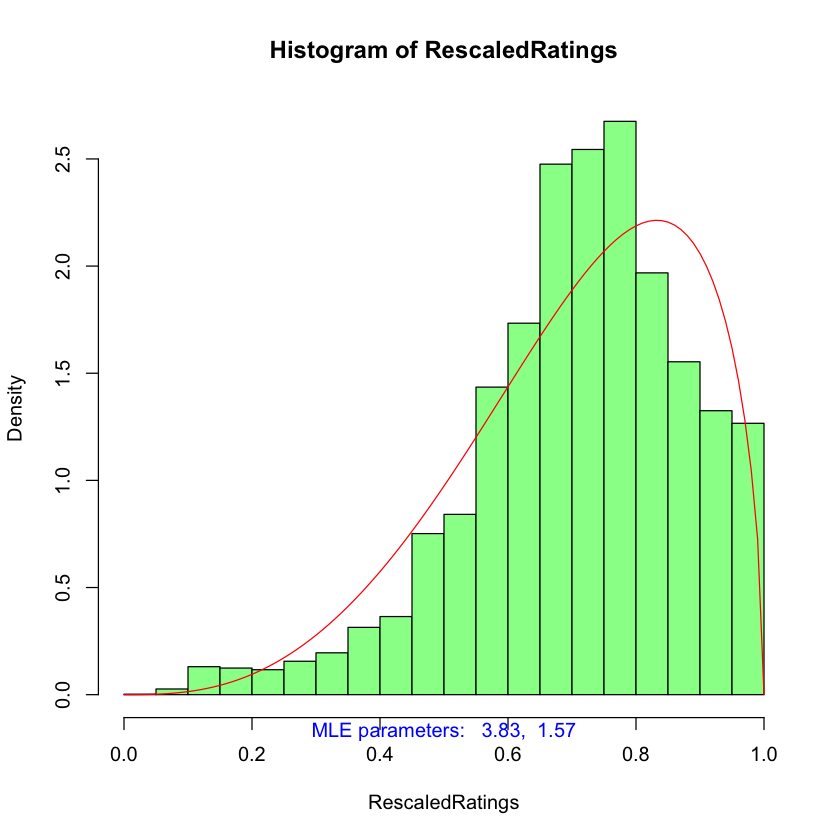

In [3]:
n = length(Ratings$Rating)  
UnroundedRatings = Ratings$Rating + runif(n)
RescaledRatings = UnroundedRatings / 11.0

hist( RescaledRatings, probability=TRUE, col="palegreen")

theta = suppressWarnings(fitdistr( RescaledRatings, dataset_distribution, start=list(shape1=0.1,shape2=0.5)))

curve( dbeta(x, theta$estimate[1], theta$estimate[2]),
      col="red", add=TRUE )  

mtext( sprintf("MLE parameters:  %5.2f, %5.2f",
               theta$estimate[1], theta$estimate[2]), side=1, col="blue")

## P1.2 :  Skewness MovieTweeted Ratings

In [3]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
if (not.installed("moments"))  install.packages("moments", repos = "http://cran.us.r-project.org")  # we need the moments package
library(moments)  #  load the moments package

skewness_Ratings = skewness(Ratings$Rating)
cat(sprintf("Skewnewss of Movie Ratings : %s\n", skewness_Ratings))

Skewnewss of Movie Ratings : -0.834340023433116


## P1.3 :  Kurtosis MovieTweeted Ratings

In [4]:
kurtosis_Ratings = kurtosis(Ratings$Rating) - 3
cat(sprintf("Excess Kurtosis of Movie Ratings : %s\n", kurtosis_Ratings))

Excess Kurtosis of Movie Ratings : 0.974900057110866


## P2.1 : Highest Average Rating Movie

### Join Tables to get Average and Median Ratings

In [5]:
NumberOfRatings = data.frame(aggregate( Rating ~ MovieID, length, data=Ratings ))
colnames(NumberOfRatings) = c("MovieID", "NumberOfRatings")

TrendingMovies = subset( NumberOfRatings, NumberOfRatings > 50 )

RatingsOfTrendingMovies = merge( Ratings, TrendingMovies, by="MovieID" )  # join of tables
AveragedRatingsOfTrendingMovies = aggregate( Rating ~ MovieID, mean, data=RatingsOfTrendingMovies )
MedianRatingsOfTrendingMovies = aggregate( Rating ~ MovieID, median, data=RatingsOfTrendingMovies )
maxAveragedRating = max(AveragedRatingsOfTrendingMovies$Rating)
HotTrendingMovies = subset(AveragedRatingsOfTrendingMovies, Rating == maxAveragedRating)

URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat"
MovieText = readLines( remote.file(URL) )
Movies = matrix(sapply( MovieText,
                function(x) unlist(strsplit(sub(" [(]([0-9]+)[)]", "::\\1",x),"::"))[1:4] ),
                nrow=length(MovieText), ncol=4, byrow=TRUE )
colnames(Movies) = c("MovieID", "MovieTitle", "Year", "Genres")

### Get Movie Title based on Movie ID of Highest Average Rating

In [6]:
get_movie_information = function(movie_id){
    highest_movie_id = paste(rep("0",
    (nchar(max(Ratings$MovieID)) - nchar(movie_id))), toString(movie_id), sep="")
    average_rating = subset(AveragedRatingsOfTrendingMovies, MovieID == movie_id)$Rating 
    movie_name = strsplit(Movies[which(Movies[, "MovieID"] == highest_movie_id), "MovieTitle"], "MovieTitle: ")
    median_rating = subset(MedianRatingsOfTrendingMovies, MovieID == movie_id)$Rating    

    return (c(movie_name, average_rating, median_rating))
}

In [7]:
movie_id = HotTrendingMovies$MovieID[1]

movie_details = get_movie_information(movie_id)
cat(sprintf("Highest Average Movie Rating\nName : %s\t Average Rating : %s\tMedian Rating : %s", movie_details[1], 
           movie_details[2], movie_details[3]))

Highest Average Movie Rating
Name : The Shawshank Redemption	 Average Rating : 9.43649635036496	Median Rating : 10

## P2.2 : Largest Difference |Median - Average| Rating Movie 

In [8]:
difference_median_average = data.frame( AveragedRatingsOfTrendingMovies$MovieID, 
                                       abs(AveragedRatingsOfTrendingMovies$Rating - MedianRatingsOfTrendingMovies$Rating))
colnames(difference_median_average) = c("MovieID", "DifferenceRating")

maxDifferenceRating = max(difference_median_average$DifferenceRating)
largest_difference_movie = subset(difference_median_average, DifferenceRating == maxDifferenceRating)$MovieID[1]

diff_movie_details = get_movie_information(largest_difference_movie)
cat(sprintf("Largest Difference |Median - Average| Movie Rating\nName : %s\t Average Rating : %s\tMedian Rating : %s", diff_movie_details[1], 
           diff_movie_details[2], diff_movie_details[3]))

Largest Difference |Median - Average| Movie Rating
Name : This Is Us	 Average Rating : 6.56637168141593	Median Rating : 9

## P3.1 : IMDb Ratings Distribution 

In [9]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
if (not.installed("ggplot2movies"))  install.packages("ggplot2movies", repos = "http://cran.us.r-project.org")  # we need the ggplot2movies package
library(ggplot2movies) #  load the ggplot2movies package

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package
library(MASS)  #  load the MASS package

Distribution = c("logistic", "geometric", "cauchy", "beta", "chi-squared","normal", "t", "lognormal", "exponential", "weibull" )
maximum_likelihood = -Inf

for (i in 1:length(Distribution)) {
  dist_name = Distribution[i]
  Dataset = movies$rating+1
  
  if(dist_name == "beta"){
    # to enable execution of fitdistr(beta) on dataset   
    n = length(movies$rating)  
    UnroundedRatings = movies$rating + runif(n)
    RescaledRatings = UnroundedRatings / 11.0
    fit = suppressWarnings( fitdistr ( RescaledRatings, dist_name , start=list(shape1=0.1,shape2=0.5)))
  }
  else if (dist_name == "chi-squared") {
    fit = suppressWarnings( fitdistr( Dataset, dist_name, list(df=round((mean(Dataset)))) , method="BFGS" ) )
  }
  else {
    fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
  } 
 
  fitted_parameters = fit$estimate
  log_likelihood = fit$loglik
  
  parameter_value_string = paste((fitted_parameters), collapse=",")
  cat(sprintf("%s %s\n", dist_name, parameter_value_string))  
  cat(sprintf("               log-likelihood = %f\n\n", log_likelihood))
  
  if (log_likelihood > maximum_likelihood) {
    maximum_likelihood = log_likelihood
    imdb_dataset_distribution = dist_name
    imdb_dataset_parameters = parameter_value_string
  }
 }
cat("Distribution of Dataset : \n")
cat(sprintf("%s %s\n", imdb_dataset_distribution, imdb_dataset_parameters))


logistic 7.00081225122267,0.878677585083951
               log-likelihood = -109522.501503

geometric 0.126058096340052
               log-likelihood = -Inf

cauchy 7.12192864104402,0.904767692628137
               log-likelihood = -118614.996183

beta 6.19935958962765,4.42030710989774
               log-likelihood = 30898.722752

chi-squared 7.70684471201785
               log-likelihood = -135645.770545

normal 6.93285024154589,1.55301759135818
               log-likelihood = -109295.028532

t 6.94959224899396,1.50864576887173,35.0648751160295
               log-likelihood = -109273.037631

lognormal 1.90675409966441,0.25576442125943
               log-likelihood = -115353.469410

exponential 0.14424081945509
               log-likelihood = -172617.500660

gamma 17.1051140657441,2.46725731384161
               log-likelihood = -112624.018853

weibull 5.19357228568245,7.53467352066348
               log-likelihood = -108461.143106

Distribution of Dataset : 
beta 6.19935958962765,4.42

### Plot histogram against distribution

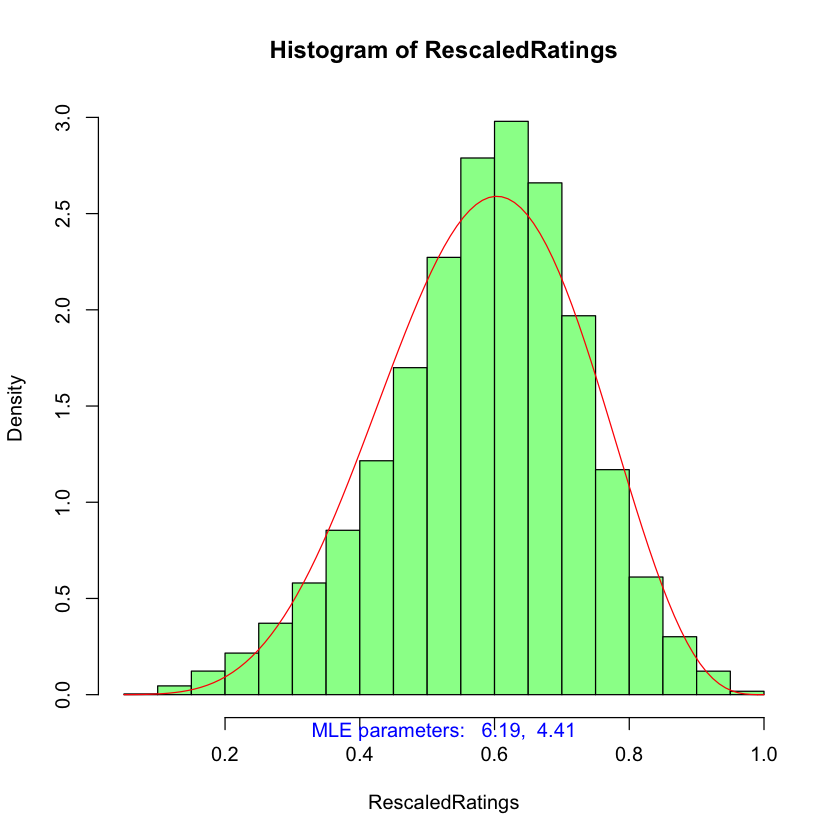

In [25]:
n = length(movies$rating)  
UnroundedRatings = movies$rating + runif(n)
RescaledRatings = UnroundedRatings / 11.0

hist( RescaledRatings, probability=TRUE, col="palegreen")

theta = suppressWarnings(fitdistr( RescaledRatings, dataset_distribution, start=list(shape1=0.1,shape2=0.5)))

curve( dbeta(x, theta$estimate[1], theta$estimate[2]),
      col="red", add=TRUE )  

mtext( sprintf("MLE parameters:  %5.2f, %5.2f",
               theta$estimate[1], theta$estimate[2]), side=1, col="blue")

## P3.2 : Skewness IMDb Ratings 

In [10]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
if (not.installed("moments"))  install.packages("moments", repos = "http://cran.us.r-project.org")  # we need the moments package
library(moments)  #  load the moments package

skewness_IMDb_Ratings = skewness(movies$rating)
cat(sprintf("Skewnewss of IMDb Ratings : %s\n", skewness_IMDb_Ratings))

Skewnewss of IMDb Ratings : -0.405706789944686


## P3.3 : Kurtosis IMDb Ratings

In [11]:
kurtosis_IMDb_Ratings = kurtosis(movies$rating) - 3
cat(sprintf("Excess Kurtosis of IMDb Ratings : %s\n", kurtosis_IMDb_Ratings))

Excess Kurtosis of IMDb Ratings : 0.115772886655793


## P4 : Multiple Answer Questions 

In [12]:
skewness_gamma = 5
gamma_not_negatively_skewness = "True"

## Output Answers to CSV

In [20]:
# Delete output csv if it exists
if (file.exists(output_file)) {
  file.remove(output_file)
}

p1 = paste(dataset_distribution, dataset_parameters, sep=",")
p2 = paste("skewness",skewness_Ratings,"",sep=",")
p3 = paste("kurtosis",kurtosis_Ratings,"",sep=",")
p4 = paste(movie_details[1], movie_details[3], movie_details[2], sep=",")
p5 = paste(diff_movie_details[1], diff_movie_details[3], diff_movie_details[2], sep=",")
p6 = paste(imdb_dataset_distribution, imdb_dataset_parameters, sep=",")
p7 = paste("skewness",skewness_IMDb_Ratings,"",sep=",")
p8 = paste("kurtosis",kurtosis_IMDb_Ratings,"",sep=",")
p9 = paste(skewness_gamma,"","", sep=",")
p10 = paste(gamma_not_negatively_skewness,"","", sep=",")

output_data = paste(p1, p2, p3, p4, p5, p6, p7, p8,  p9, p10, collapse = "\n", sep = "\n")
cat(output_data, file = output_file, sep = "\n", append = TRUE)
cat(output_data, sep = "\n")

[1] TRUE

beta,3.84323319679984,1.57428761619103
skewness,-0.834340023433116,
kurtosis,0.974900057110866,
The Shawshank Redemption,9.43649635036496,10
This Is Us,6.56637168141593,9
beta,6.19935958962765,4.42030710989774
skewness,-0.405706789944686,
kurtosis,0.115772886655793,
5,,
True,,
